<a href="https://colab.research.google.com/github/fereshteh-bahadory/NewProject/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import cv2
import os
import pathlib
from matplotlib import pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
Image_height=256
Image_width=256
Image_channel=3

seed =20
seed = np.random.seed

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
from keras.utils.np_utils import to_categorical 

In [6]:
directory = pathlib.Path('/content')
X = np.full((25,256,256,3),0)
im_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      #print(type(image_name))
      if image_name.endswith(".png"):
        im_name.append(image_name)
        im_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    for i, image_name in enumerate(images):
      if image_name.endswith('.png'):
        str_name = str(image_name)
        k = im_name.index(str_name)
        #print(image_name)
        image = cv2.imread(path+"/"+image_name,3)
        #iamge = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        #image = Image.fromarray(image)
        image=np.array(image)
        X[k]=image

In [26]:
directory = pathlib.Path('/content')
y_lb=np.full((25,256,256),0)
lb_name=[]
v=0
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      if image_name.endswith(".png"):
        lb_name.append(image_name)
        lb_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      v=v+1
      if image_name.endswith(".png"):
        str_lb=str(image_name)
        l = lb_name.index(image_name)       
        label = cv2.imread(path+"/"+image_name,cv2.IMREAD_GRAYSCALE)
        #label = cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
        #label = scaler.fit_transform(label.reshape(-1, label.shape[-1])).reshape(label.shape)
        #label = Image.fromarray(label)
        label=np.array(label)
        #label = to_categorical(label)
        y_lb[l]=label

In [8]:
y_1 = np.full((25,256,256),0)
y = np.full((25,256,256,1),0)
matrix = np.full((25,256,256),0)
pmat = np.full((25,65536),0)
for i in range(0,25):
  mat = np.zeros(y_lb[i].size)
  mat2 = np.zeros(y_lb[i].size)
  flat_lb = y_lb[i].flatten()
  for j in range(0,y_lb[i].size):
    if flat_lb[j]>0.8:
      mat[j] = 1
    else:
      mat[j]=0
  mat2_2=mat2*255
  mat2_reshape = mat2_2.reshape(256,256)
  mat2_fin= np.expand_dims(mat2_reshape, axis = 2)
  pmat[i]=mat
  mat_reshape=mat.reshape(256,256)
  y[i]=mat2_fin
  matrix[i]=mat_reshape
for i in range(0,25):
  y[i]=np.expand_dims(matrix[i], axis = 2)

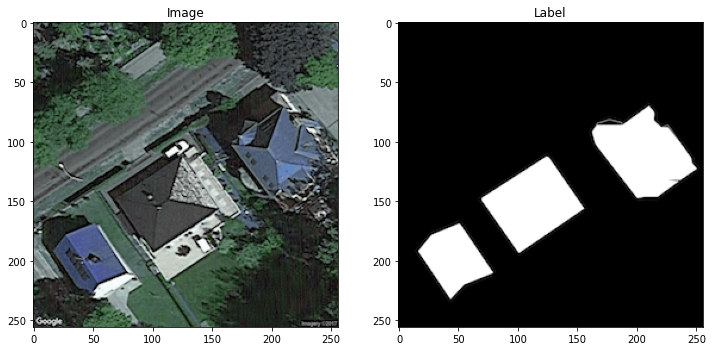

In [9]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[t])
plt.title('Image')
plt.subplot(122)
plt.imshow(y_lb[t], cmap='gray')
plt.title('Label')
plt.show()

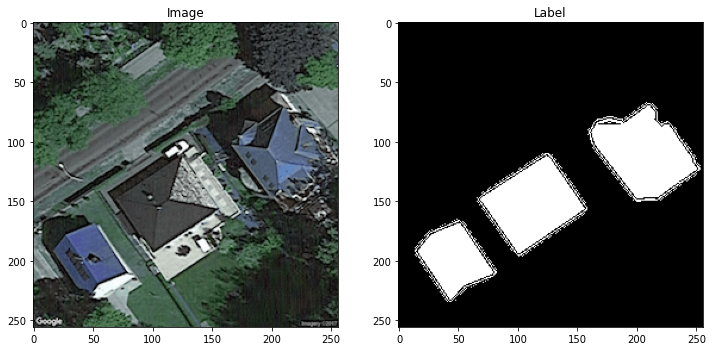

In [29]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[12])
plt.title('Image')
plt.subplot(122)
plt.imshow(matrix[12], cmap='gray')
plt.title('Label')
plt.show()

In [11]:
#Defining a model
Inputs = layers.Input((Image_height,Image_width,Image_channel))
s = layers.Lambda(lambda x: x / 255)(Inputs)#to make everything float

#encoder layers
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)#drop some datas to prevent over fitting
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D((2, 2))(c5)

c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c6 = tf.keras.layers.Dropout(0.1)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
p6 = tf.keras.layers.MaxPooling2D((2, 2))(c6)

c7 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p6)
c7 = tf.keras.layers.Dropout(0.1)(c7)
c7 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

#decoder layers
u8 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c6])
c8 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c5])
c9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

u10 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c9)
u10 = tf.keras.layers.concatenate([u10, c4])
c10 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = tf.keras.layers.Dropout(0.2)(c10)
c10 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)

u11 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c10)
u11 = tf.keras.layers.concatenate([u11, c3])
c11 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
c11 = tf.keras.layers.Dropout(0.2)(c11)
c11 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)

u12 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c11)
u12 = tf.keras.layers.concatenate([u12, c2])
c12 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u12)
c12 = tf.keras.layers.Dropout(0.2)(c12)
c12 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u12)

u13 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c12)
u13 = tf.keras.layers.concatenate([u13, c1])
c13 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u13)
c13 = tf.keras.layers.Dropout(0.2)(c13)
c13 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u13)


outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c13)
 
model = tf.keras.Model(inputs=[Inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 8)  224         ['lambda[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 8)  0           ['conv2d[0][0]']             

In [12]:
results = model.fit(X, y, validation_split=0.04, batch_size=1, epochs=100)
mymodel=results.model

Epoch 1/100
24/24 [==============================] - 14s 455ms/step - loss: 0.6004 - accuracy: 0.7268 - val_loss: 0.5239 - val_accuracy: 0.8412
Epoch 2/100
24/24 [==============================] - 10s 438ms/step - loss: 0.4797 - accuracy: 0.8335 - val_loss: 0.4480 - val_accuracy: 0.8412
Epoch 3/100
24/24 [==============================] - 11s 444ms/step - loss: 0.4498 - accuracy: 0.8335 - val_loss: 0.3755 - val_accuracy: 0.8412
Epoch 4/100
24/24 [==============================] - 11s 446ms/step - loss: 0.4395 - accuracy: 0.8335 - val_loss: 0.4040 - val_accuracy: 0.8412
Epoch 5/100
24/24 [==============================] - 11s 449ms/step - loss: 0.4207 - accuracy: 0.8335 - val_loss: 0.3516 - val_accuracy: 0.8412
Epoch 6/100
24/24 [==============================] - 14s 566ms/step - loss: 0.4225 - accuracy: 0.8335 - val_loss: 0.3424 - val_accuracy: 0.8412
Epoch 7/100
24/24 [==============================] - 11s 456ms/step - loss: 0.4009 - accuracy: 0.8335 - val_loss: 0.3217 - val_accuracy:

In [13]:
idx = random.randint(0, len(X))


preds_train = model.predict(X[:int(X.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X[int(X.shape[0]*0.9):], verbose=1)


 
preds_train_t = (preds_train > 0.4).astype(np.uint8)
preds_val_t = (preds_val > 0.4).astype(np.uint8)

1/1 [==============================] - 0s 280ms/step


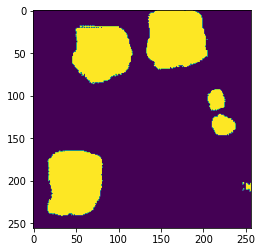

In [14]:
preds_train_t[1].shape
l = np.squeeze(preds_train_t[1])
plt.imshow(l)

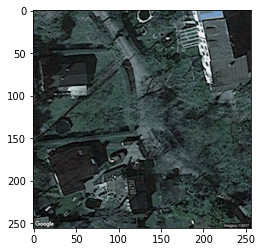

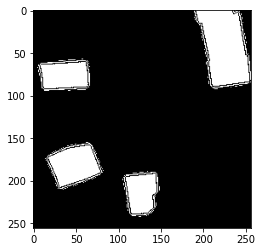

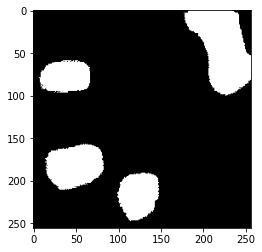

In [15]:
ix = random.randint(0, len(preds_train_t))
plt.imshow(X[ix])
plt.show()
plt.imshow(np.squeeze(y[ix]), cmap='gray')
plt.show()
plt.imshow(np.squeeze(preds_train_t[ix]),cmap='gray')
plt.show()

In [18]:
directory = pathlib.Path('/content')
X_test = np.full((5,256,256,3),0)
im_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'test_images':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      #print(image_name)
      if image_name.endswith(".png"):
        im_name.append(image_name)
        im_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'test_images':
    for i, image_name in enumerate(images):
      if image_name.endswith('.png'):
        str_name = str(image_name)
        k = im_name.index(str_name)
        test_im = cv2.imread(path+"/"+image_name,3)
        #iamge = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        #image = Image.fromarray(image)
        test_im=np.array(test_im)
        X_test[k]=test_im

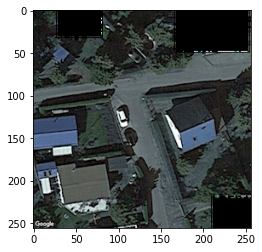

In [19]:
plt.imshow(X_test[2])

In [20]:
preds_test = model.predict(X_test, verbose=1)
preds_test_t = (preds_test > 0.4).astype(np.uint8)

1/1 [==============================] - 1s 824ms/step


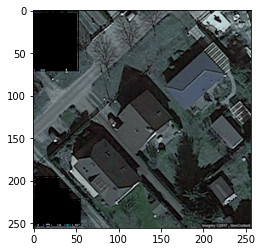

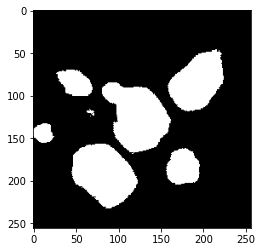

In [21]:
ix = random.randint(0,4)
plt.imshow(X_test[ix])
plt.show()
plt.imshow(np.squeeze(preds_test_t[ix]), cmap='gray')
plt.show()

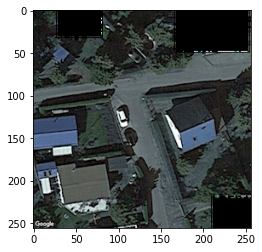

In [22]:
plt.imshow(X_test[2])

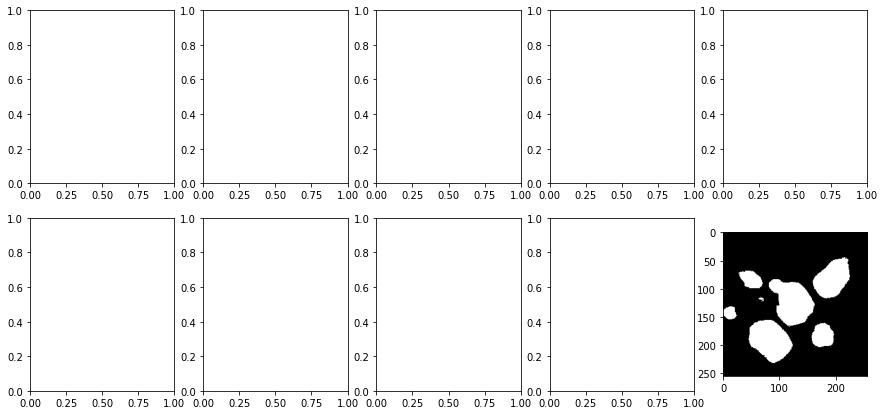

In [24]:
fig, ax = plt.subplots(2,5, figsize=(15,7))
for i in range(5):
  ax[0,i]=plt.imshow(X_test[i])
  ax[1,i]=plt.imshow(np.squeeze(preds_test_t[i]), cmap='gray')